In [1]:
!pip install psycopg2 seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 446.7 MB/s eta 0:00:00
  Created wheel for psycopg2: filename=psycopg2-2.9.9-cp39-cp39-linux_x86_64.whl size=494302 sha256=6d3f4e5a35cad77e5ca4621c40f7025f45c07882a5c661c5e5822875255e0712
  Stored in directory: /tmp/pip-ephem-wheel-cache-sktfmi9y/wheels/3a/06/25/adb124afd8c8346e45c455f6586f7289cde2b4e339dfbcd9e9
Successfully built psycopg2

[notice] A new release of pip available: 22.2.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


# Download the data

In [2]:
import psycopg2

conn = psycopg2.connect(
   database="transactionsdb", user='transactionsdb', password='transactionsdb', host='transactionsdb.mlops-transactionsdb.svc.cluster.local', port= '5432'
)

In [3]:
with open('out.csv', 'w') as f:
    cur = conn.cursor()
    cur.copy_expert('COPY transactions.transactions TO STDOUT WITH CSV HEADER', f)

# Analyze the data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('out.csv')

In [6]:
data.head()

,transaction_id,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,1,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,2,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,3,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,4,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,5,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   transaction_id                  1000000 non-null  int64  
 1   distance_from_home              1000000 non-null  float64
 2   distance_from_last_transaction  1000000 non-null  float64
 3   ratio_to_median_purchase_price  1000000 non-null  float64
 4   repeat_retailer                 1000000 non-null  float64
 5   used_chip                       1000000 non-null  float64
 6   used_pin_number                 1000000 non-null  float64
 7   online_order                    1000000 non-null  float64
 8   fraud                           1000000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 68.7 MB


In [8]:
# number of columns
print(f'# columns: {data.shape[1]}')

# number of rows
print(f'# rows: {data.shape[0]}')

# columns: 9
# rows: 1000000


In [9]:
# Check the sum of missing values for each column
data.isnull().sum()

transaction_id                    0
distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [10]:
# Check the sum of duplicate rows
print(f'# duplicate rows: {data.duplicated().sum()}')

# duplicate rows: 0


In [11]:
# Creating a descriptive statistics table for data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,1000000.0,500000.500000,288675.278932,1.000000,250000.750000,500000.500000,750000.250000,1000000.000000
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


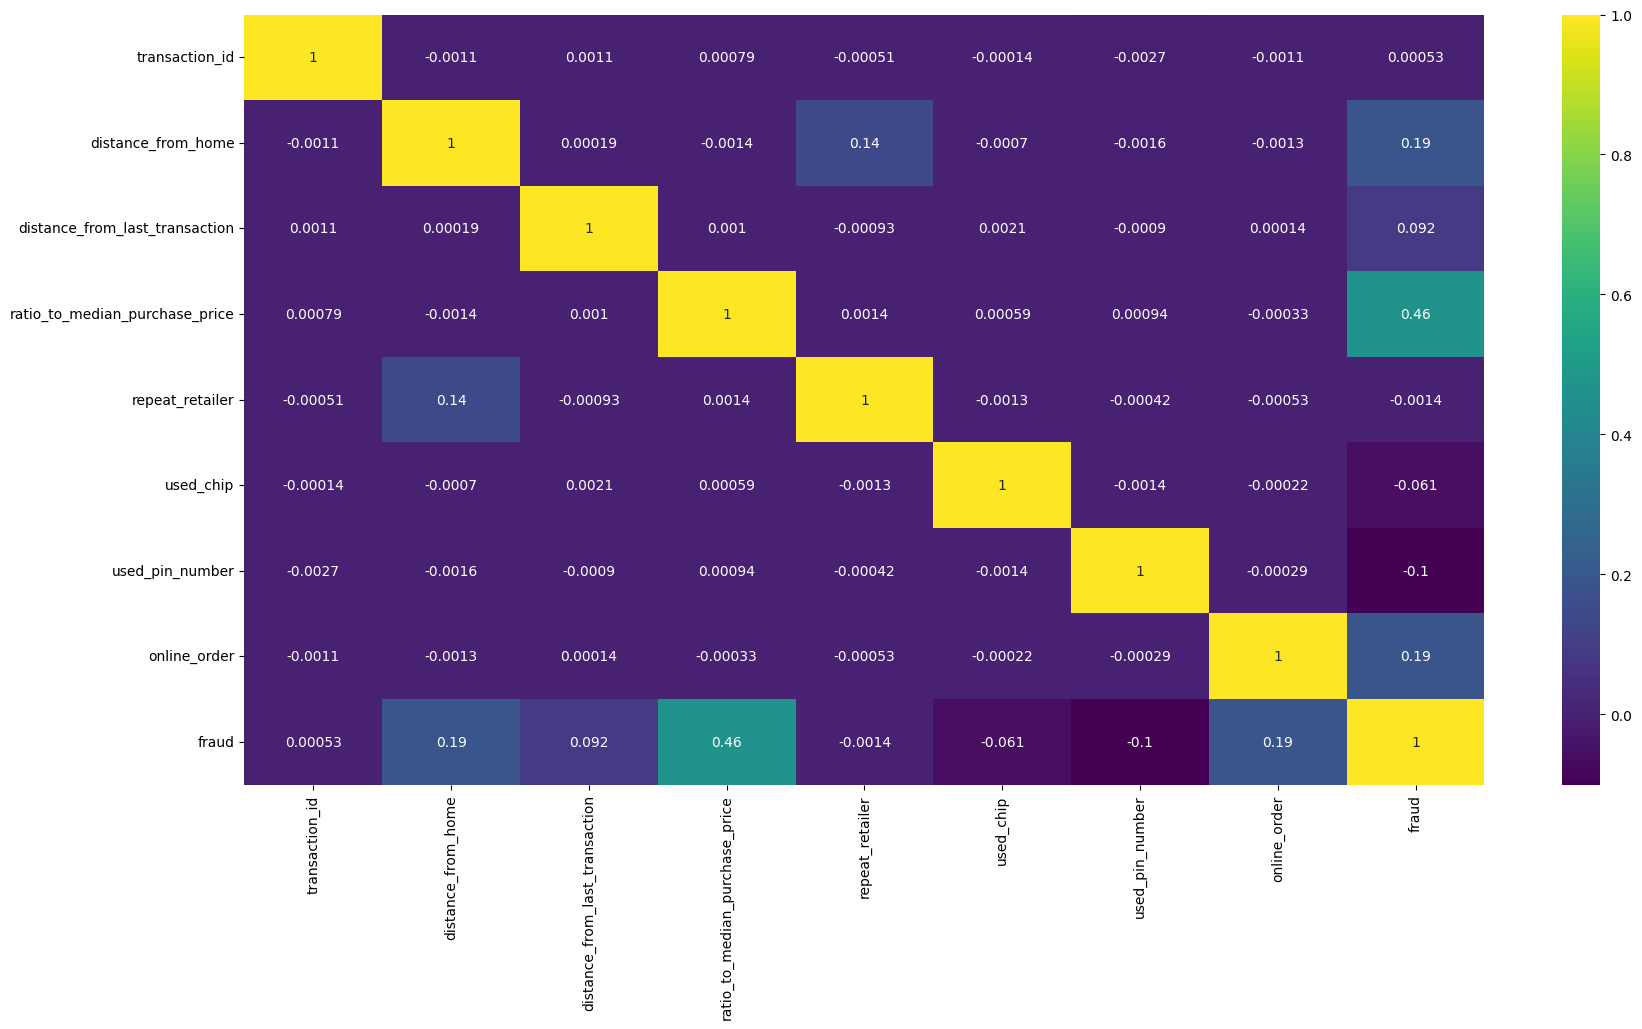

In [12]:
# Heatmap to explain the correlation between the features
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True, cmap='viridis')
plt.show()

In [13]:
# Correlations with fraud
corr = data.corr()['fraud'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,fraud
fraud,1.000000
ratio_to_median_purchase_price,0.462305
online_order,0.191973
distance_from_home,0.187571
distance_from_last_transaction,0.091917
transaction_id,0.000527
repeat_retailer,-0.001357
used_chip,-0.060975
used_pin_number,-0.100293


In [14]:
data['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

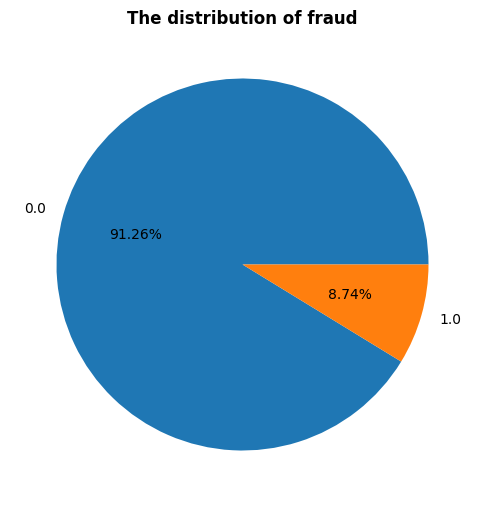

In [15]:
plt.figure(figsize = (6, 8))
plt.pie(x = data['fraud'].value_counts().values,
        labels = data['fraud'].value_counts().index, 
        autopct = '%1.2f%%')
plt.title('The distribution of fraud', size = 12, weight = 'bold')
plt.show()

In [16]:
# Create a list containing categorical features
cat_features = ['repeat_retailer', 'used_chip','used_pin_number', 'online_order']

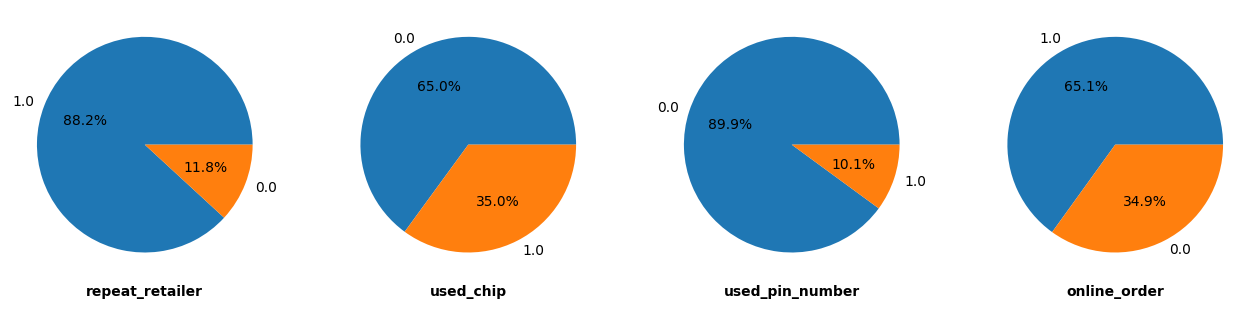

In [17]:
# Drawing a pie plot to display the distribution of each categorical column
plt.figure(figsize = (16, 12))
for i, col in enumerate(cat_features):
    plt.subplot(1, 4, i+1)
    plt.pie(x = data[col].value_counts().values, 
            labels = data[col].value_counts().index, 
            autopct = '%1.1f%%')
    plt.xlabel(col, weight = 'bold')
plt.show()

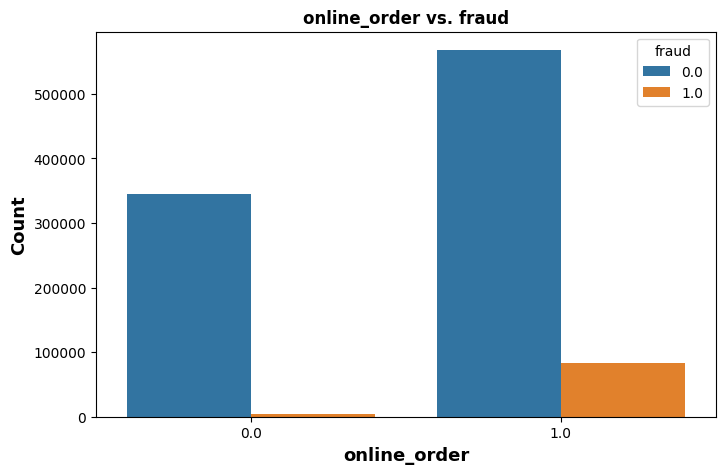

In [18]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'online_order',
              hue = 'fraud')


# Add labels and title
plt.title('online_order vs. fraud', weight = 'bold')
plt.xlabel('online_order', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()

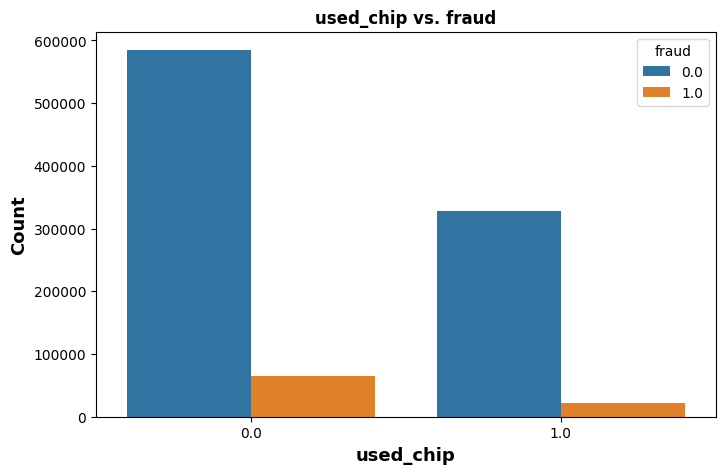

In [19]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'used_chip',
              hue = 'fraud')


# Add labels and title
plt.title('used_chip vs. fraud', weight = 'bold')
plt.xlabel('used_chip', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()

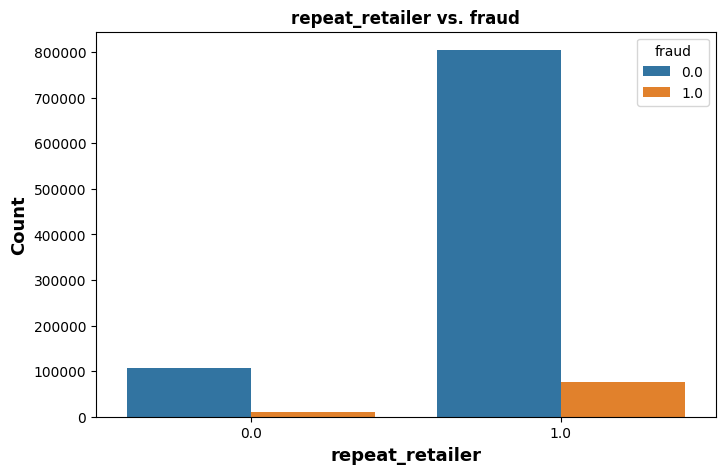

In [20]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'repeat_retailer',
              hue = 'fraud')


# Add labels and title
plt.title('repeat_retailer vs. fraud', weight = 'bold')
plt.xlabel('repeat_retailer', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()